In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
Url = 'https://raw.githubusercontent.com/IT22106360/QuantaML-FDM-Employee-Retention/refs/heads/main/artifacts/Preprocessed_dataset.csv'
final_dataset = pd.read_csv(Url, encoding='latin-1')
final_dataset

,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0.920,1,2.0,0.0,1.0,1
1,0.776,0,2.0,0.0,5.0,0
2,0.624,0,2.0,0.0,0.0,0
3,0.789,0,2.0,0.0,0.0,1
4,0.767,1,2.0,0.0,4.0,0
...,...,...,...,...,...,...
19153,0.878,0,2.0,0.0,1.0,1
19154,0.920,1,2.0,0.0,4.0,1
19155,0.920,1,2.0,0.0,4.0,0
19156,0.802,1,2.0,0.0,2.0,0


In [55]:
X = final_dataset.drop('target', axis=1)  # Features
y = final_dataset['target']  # target variable

In [56]:
X.shape
y.shape

(19158,)

In [57]:
y.value_counts()

target
0    14381
1     4777
Name: count, dtype: int64

Modeling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def modeler(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    scaler = StandardScaler()
    x_train =scaler.fit_transform(x_train)
    x_test =scaler.transform(x_test)

    # model training
    model.fit(x_train, y_train)


    y_pred=model.predict(x_test)


        # metrics calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc':auc }


Decision Tree Classifier

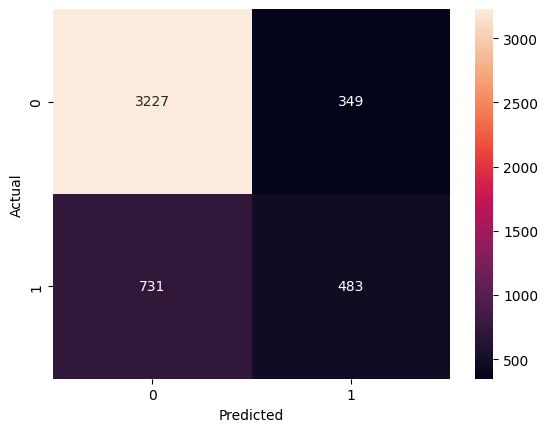

Accuracy: 0.7745302713987474
Precision: 0.5805288461538461
Recall: 0.3978583196046129
F1 Score: 0.47214076246334313
Area Under Curve: 0.6501316206524183


In [59]:
#Rashmika
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini'
                            , max_depth=10
                            , max_features='sqrt'
                            , min_samples_leaf= 1
                            , min_samples_split=2)
DT_Test = modeler(DT, X, y)

print('Accuracy:',DT_Test['acc'])
print('Precision:', DT_Test['prec'])
print('Recall:', DT_Test['rec'])
print('F1 Score:', DT_Test['f1'])
print('Area Under Curve:', DT_Test['auc'])